# 캐글 은행 대출 데이터 

In [1]:
from IPython.display import Image

## 머신러닝 딥러닝 구분

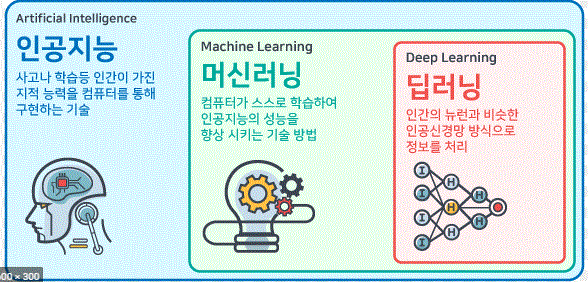

In [2]:
Image("./이미지/머신러닝딥러닝.gif", width= 700, height = 700)

## 인공지능의 다양한 적용분야

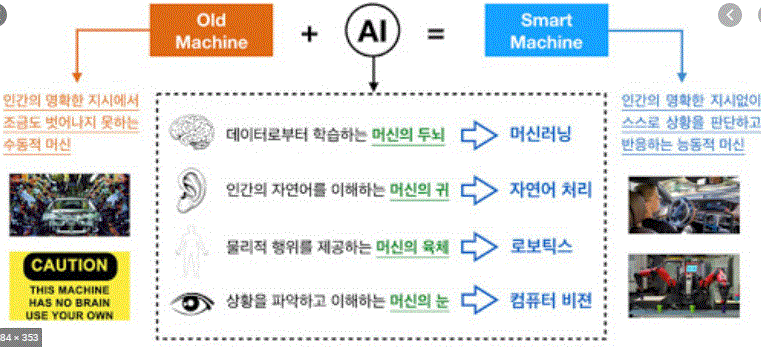

In [3]:
Image("./이미지/머신러닝딥러닝2.gif", width= 700, height = 700)

## 머신러닝 흐름

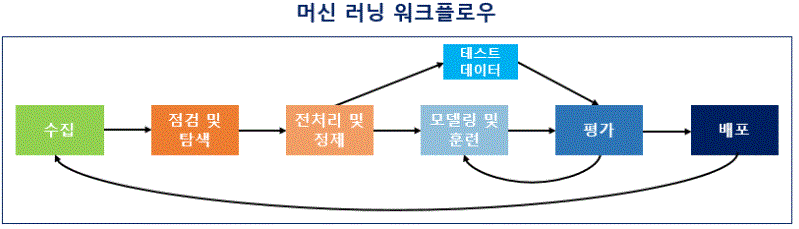

In [4]:
Image("./이미지/머신러닝흐름.gif", width= 700, height = 700)

#  Loan Data for Dummy Bank ·

https://www.kaggle.com/pjourgensen/default-analysis

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

/Users/dahlmoon/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

from imblearn.over_sampling import SMOTE


Using TensorFlow backend.


In [7]:
import tensorflow as tf

## 데이터 분석

https://www.kaggle.com/pjourgensen/default-analysis

Data Description

- LoanStatNew Description

- addr_state The state provided by the borrower in the loan application

- annual_inc The self-reported annual income provided by the borrower during registration.

- annualincjoint The combined self-reported annual income provided by the co-borrowers during registration

- application_type Indicates whether the loan is an individual application or a joint application with two co-borrowers

- collectionrecoveryfee post charge off collection fee

- collections12mthsexmed Number of collections in 12 months excluding medical collections

- delinq_2yrs The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

- desc Loan description provided by the borrower

- dti A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, - - - excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

- dti_joint A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, - excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income

- earliestcrline The month the borrower's earliest reported credit line was opened

- emp_length Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

- emp_title The job title supplied by the Borrower when applying for the loan.*

- ficorangehigh The upper boundary range the borrower’s FICO at loan origination belongs to.

- ficorangelow The lower boundary range the borrower’s FICO at loan origination belongs to.

- funded_amnt The total amount committed to that loan at that point in time.

- fundedamntinv The total amount committed by investors for that loan at that point in time.

- grade LC assigned loan grade

- home_ownership The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [8]:
df_1 = pd.read_csv('./data/loan_final313_1.csv', parse_dates=['issue_d'])

In [9]:
df_2 = pd.read_csv('./data/loan_final313_2.csv', parse_dates=['issue_d'])

In [10]:
df = pd.concat([df_1, df_2], axis=0)

In [11]:
df.shape

(887379, 31)

In [12]:
df.head()

,Unnamed: 0,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,691823,55058145,2015,2015-01-07,1012016,10.0,OWN,2,Low,32000,...,0,13.99,C,3,15.34,2252.07,1557.79,0.0,382.74,leinster
1,360841,20007517,2014,2014-01-07,1042015,4.0,MORTGAGE,3,Low,93500,...,0,11.67,B,2,24.17,30343.63,28000.00,0.0,925.60,leinster
2,384243,17052611,2014,2014-01-06,1012016,7.0,OWN,2,Low,70000,...,0,17.57,D,4,27.14,12034.79,5752.69,0.0,633.41,ulster
3,856101,39957544,2015,2015-01-02,1012016,2.0,RENT,1,Low,96000,...,0,11.44,B,2,14.55,4819.04,2868.56,0.0,439.25,Northern-Irl
4,879201,38506066,2015,2015-01-01,1122015,4.0,RENT,1,Low,75000,...,0,15.99,D,4,15.46,12752.40,11200.00,0.0,393.71,ulster


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 0 to 443689
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            887379 non-null  int64         
 1   id                    887379 non-null  int64         
 2   year                  887379 non-null  int64         
 3   issue_d               887379 non-null  datetime64[ns]
 4   final_d               887379 non-null  int64         
 5   emp_length_int        887379 non-null  float64       
 6   home_ownership        887379 non-null  object        
 7   home_ownership_cat    887379 non-null  int64         
 8   income_category       887379 non-null  object        
 9   annual_inc            887379 non-null  int64         
 10  income_cat            887379 non-null  int64         
 11  loan_amount           887379 non-null  int64         
 12  term                  887379 non-null  object        
 13 

In [14]:
df.isnull().sum()

Unnamed: 0              0
id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
loan_condition_cat      0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
dtype: int64

In [15]:
df.columns

Index(['Unnamed: 0', 'id', 'year', 'issue_d', 'final_d', 'emp_length_int',
       'home_ownership', 'home_ownership_cat', 'income_category', 'annual_inc',
       'income_cat', 'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region'],
      dtype='object')

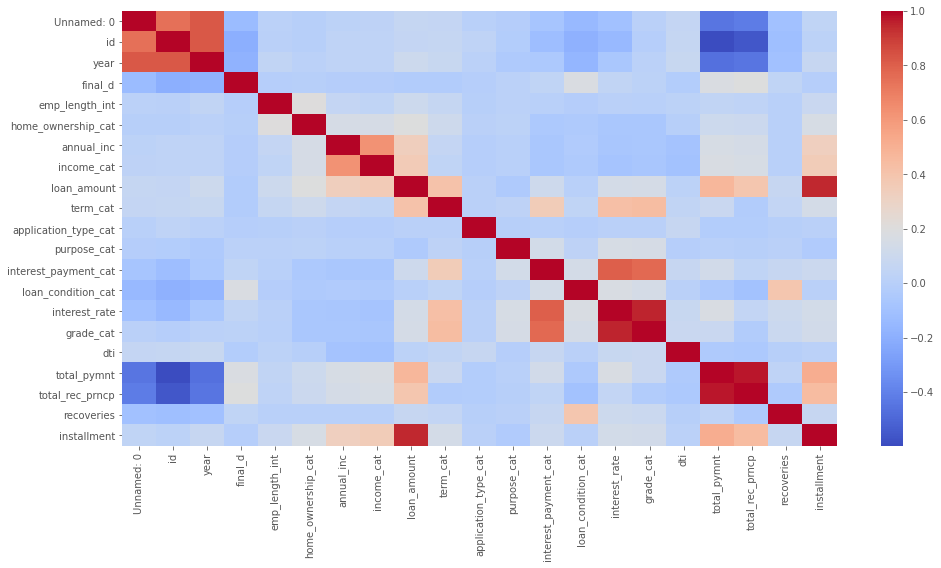

In [16]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap = 'coolwarm')

## 정답 칼럼 생성

In [17]:
def defaulted(x):
    if x == 'Good Loan':
        return 0
    else:
        return 1

In [18]:
df['default'] = df['loan_condition'].apply(lambda x: defaulted(x))

In [19]:
df['default'].value_counts()

0    819950
1     67429
Name: default, dtype: int64

## Train Test Split

In [20]:
X = df.drop(['default', 'id', 'year','loan_condition', 'issue_d', 'home_ownership', 'income_category', 
              'term', 'application_type', 'purpose', 'interest_payments', 'loan_condition','loan_condition_cat', 'grade', 'region'],axis=1)
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [21]:
rf_base = RandomForestClassifier(n_estimators=100)

In [22]:
ada_base = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100)

In [23]:
rf_base.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
ada_base.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [25]:
rf_base_pred = rf_base.predict(X_test)

In [26]:
ada_base_pred = ada_base.predict(X_test)

In [27]:
print(confusion_matrix(y_test, rf_base_pred))

[[245815     14]
 [  3600  16785]]


In [28]:
print(confusion_matrix(y_test, ada_base_pred))

[[242689   3140]
 [  2864  17521]]


In [29]:
print(accuracy_score(y_test,rf_base_pred))

0.9864244555132338


In [30]:
print(accuracy_score(y_test,ada_base_pred))

0.9774467158000706


In [31]:
print(recall_score(y_test,rf_base_pred))

0.8233995584988962


In [32]:
print(recall_score(y_test,ada_base_pred))

0.859504537650233


In [33]:
f1_score(y_test,rf_base_pred)

0.9028076592082616

In [34]:
f1_score(y_test,ada_base_pred)

0.8537250889246212

In [35]:
from xgboost import XGBClassifier

In [36]:
xgb = XGBClassifier()

In [37]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [38]:
xgb_pred = xgb.predict(X_test)

In [39]:
recall_score(y_test,xgb_pred)

0.7632572970321315

In [40]:
precision_score(y_test,xgb_pred)

0.9998072227220152

In [41]:
confusion_matrix(y_test, xgb_pred)

array([[245826,      3],
       [  4826,  15559]])

In [42]:
f1_score(y_test,xgb_pred)

0.8656633376916014